## Testing and Training of a basic summarization model:

#### Types of summary:
##### 1. Extractive Summary:
Extractive summarization involves selecting key sentences or phrases from the original text to create a summary.

TF-IDF + TextRank:

* TF-IDF (Term Frequency-Inverse Document Frequency) is used to weigh the importance of words.
* TextRank is an algorithm that ranks sentences based on their importance using a graph-based approach.

##### 2. Abstractive Summary:
Abstractive summarization involves generating new sentences that capture the essence of the original text, rather than just extracting key sentences.

Transformer-Based Models:

1. BERTSUM: A variant of BERT fine-tuned for extractive summarization.
2. Bart: A transformer model specifically designed for summarization tasks.
3. T5 (Text-To-Text Transfer Transformer): A model that frames all NLP tasks as text-to-text problems, including summarization.
4. PEGASUS: A model designed for abstractive summarization with state-of-the-art performance.


# Extractive Summary:
___________

### 1. Import neccessary libraries:


In [218]:
import spacy # For tokenizing text into sentences.

from sklearn.metrics.pairwise import cosine_similarity # Measures similarity between TF IDF vectors to rank them
from sklearn.feature_extraction.text import TfidfVectorizer # Converts text data into TF IDF vectors.

import numpy as np

# Visualization:
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Preprocess text into sentences:

In [219]:
nlp = spacy.load("en_core_web_sm")

In [220]:
def preprocess_text(text):
    """Processes the given `text` into sentences."""

    doc = nlp(text)

    sentences = [sent.text.strip() for sent in doc.sents]

    return sentences

In [221]:
def get_sentence_num(text):
    """Returns the number of sentences in the given `text`."""

### 3. Create function for extractive summary:

In [222]:
def extractive_summary_with_visualisation(text, n_sentences):
    """Generates extractive summary based on TF IDF."""

    # Process text into sentences:
    sentences = preprocess_text(text)

    if not sentences: 
        return ""
    
    # Convert sentences to TF - IDF matrix:
    tfidf_vectorizer = TfidfVectorizer()

    tfidf_matrix = tfidf_vectorizer.fit_transform(sentences)

    # Compute cosine similarity:
    similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

    # Sum the similarity scores for each sentence:
    sentence_scores = similarity_matrix.sum(axis = 1)

    # Get the indices of top sentences:
    ranked_sentences = [sentences[i] for i in np.argsort(sentence_scores, axis = 0)[-n_sentences:]]


    # --- Visualisation ---
    from sklearn.preprocessing import Normalizer

    tfidf_array = Normalizer().fit_transform(tfidf_matrix).toarray()
    plt.figure(figsize=(20, 8))
    sns.heatmap(tfidf_array, cmap='inferno', annot=True, fmt='.2f', 
                xticklabels=tfidf_vectorizer.get_feature_names_out(), 
                yticklabels=[f'Sentence {i+1}' for i in range(len(sentences))])
    # Adjust layout
    plt.tight_layout()  # Automatically adjust subplot parameters to fit into figure area

    # Optional: Fine-tune layout with subplots_adjust
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
    plt.title('TF-IDF Matrix Heatmap')
    plt.xlabel('Terms')
    plt.ylabel('Sentences')
    plt.xticks(rotation=90)
    plt.show()


    plt.figure(figsize=(20, 8))
    sns.heatmap(similarity_matrix, cmap="inferno", annot=True, fmt='.2f', 
                xticklabels=[f"Sentence {i + 1}" for i in range(len(sentences))], 
                yticklabels=[f"Sentence {i + 1}" for i in range(len(sentences))])
    
    plt.title('Cosine Similarity Matrix Heatmap')
    plt.xlabel('Sentences')
    plt.ylabel('Sentences')
    plt.show()


    summarized_text = " ".join(ranked_sentences)

    sentences = list(nlp(summarized_text).sents)

    return sentences[::-1]

### 4. Test and Visualize the process:

In [223]:
test = """In the realm of artificial intelligence, machine learning is a critical subset that focuses on the development of algorithms that allow computers to learn and make predictions based on data. These algorithms build a model based on sample data, known as training data, to make decisions or predictions without being explicitly programmed to perform the task. Machine learning is a powerful tool for making sense of large volumes of data and can be applied to a variety of fields, including finance, healthcare, and transportation.

Natural language processing (NLP) is a branch of artificial intelligence that helps computers understand, interpret, and manipulate human language. NLP draws from many disciplines, including computer science and computational linguistics, to fill the gap between human communication and computer understanding. One of the key challenges in NLP is enabling computers to read and understand context in a way that is meaningful and useful.

Deep learning, a subset of machine learning, uses neural networks with many layers (hence "deep") to model complex patterns in data. Deep learning has revolutionized fields such as image and speech recognition, leading to the development of technologies like self-driving cars and virtual personal assistants. By processing vast amounts of data through these layers, deep learning models can achieve a high level of accuracy in tasks that were previously difficult for machines to handle.

One practical application of NLP and deep learning is the development of chatbots and virtual assistants. These systems use natural language processing to understand user queries and provide relevant responses. By leveraging deep learning, virtual assistants can learn from interactions and improve their responses over time, making them more useful and efficient.."""


In [224]:
preprocess_text(test)

['In the realm of artificial intelligence, machine learning is a critical subset that focuses on the development of algorithms that allow computers to learn and make predictions based on data.',
 'These algorithms build a model based on sample data, known as training data, to make decisions or predictions without being explicitly programmed to perform the task.',
 'Machine learning is a powerful tool for making sense of large volumes of data and can be applied to a variety of fields, including finance, healthcare, and transportation.',
 'Natural language processing (NLP) is a branch of artificial intelligence that helps computers understand, interpret, and manipulate human language.',
 'NLP draws from many disciplines, including computer science and computational linguistics, to fill the gap between human communication and computer understanding.',
 'One of the key challenges in NLP is enabling computers to read and understand context in a way that is meaningful and useful.',
 'Deep le

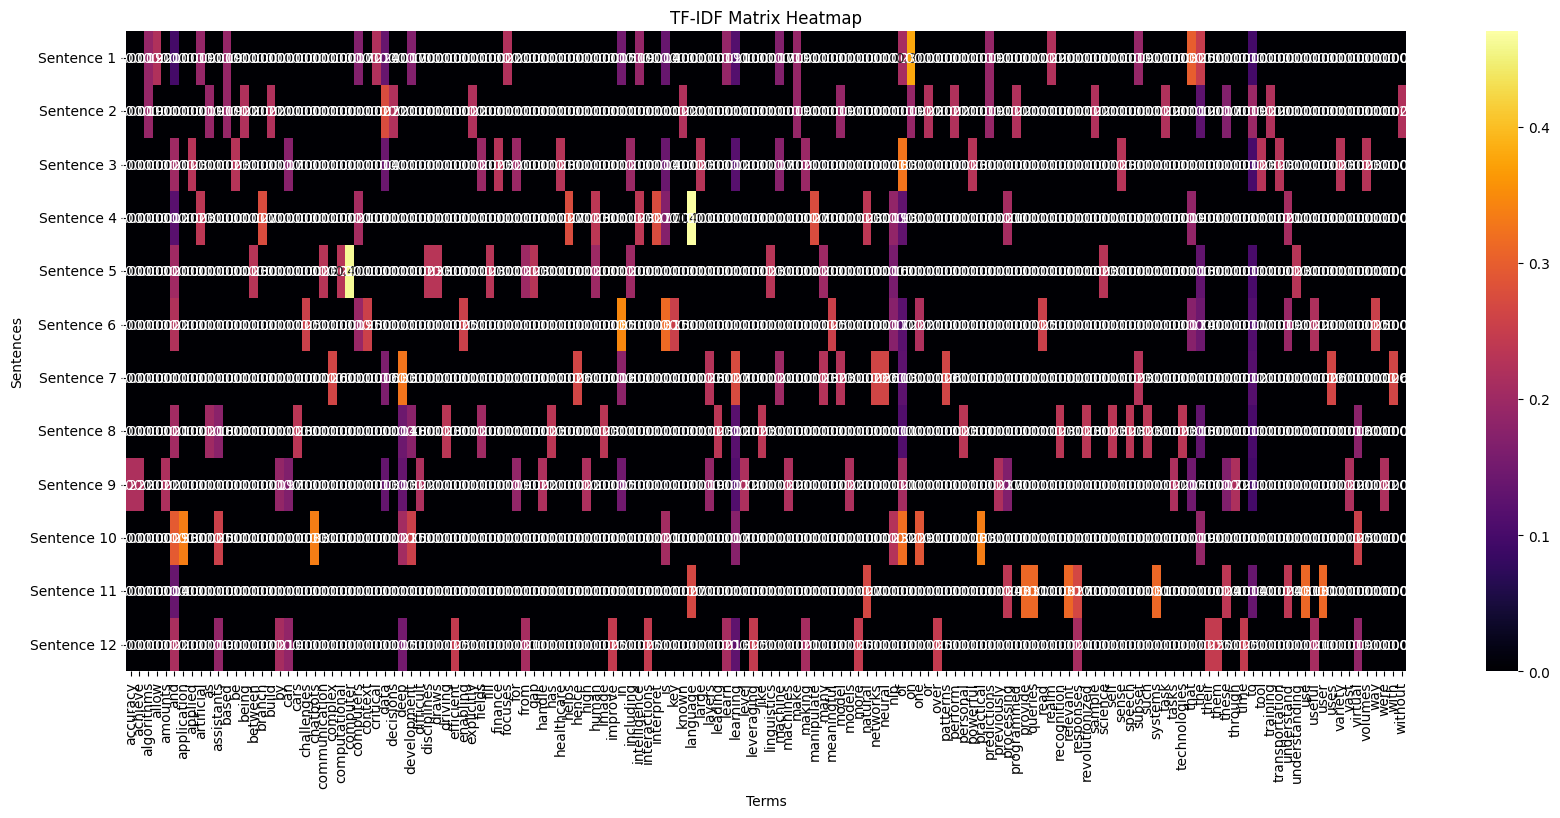

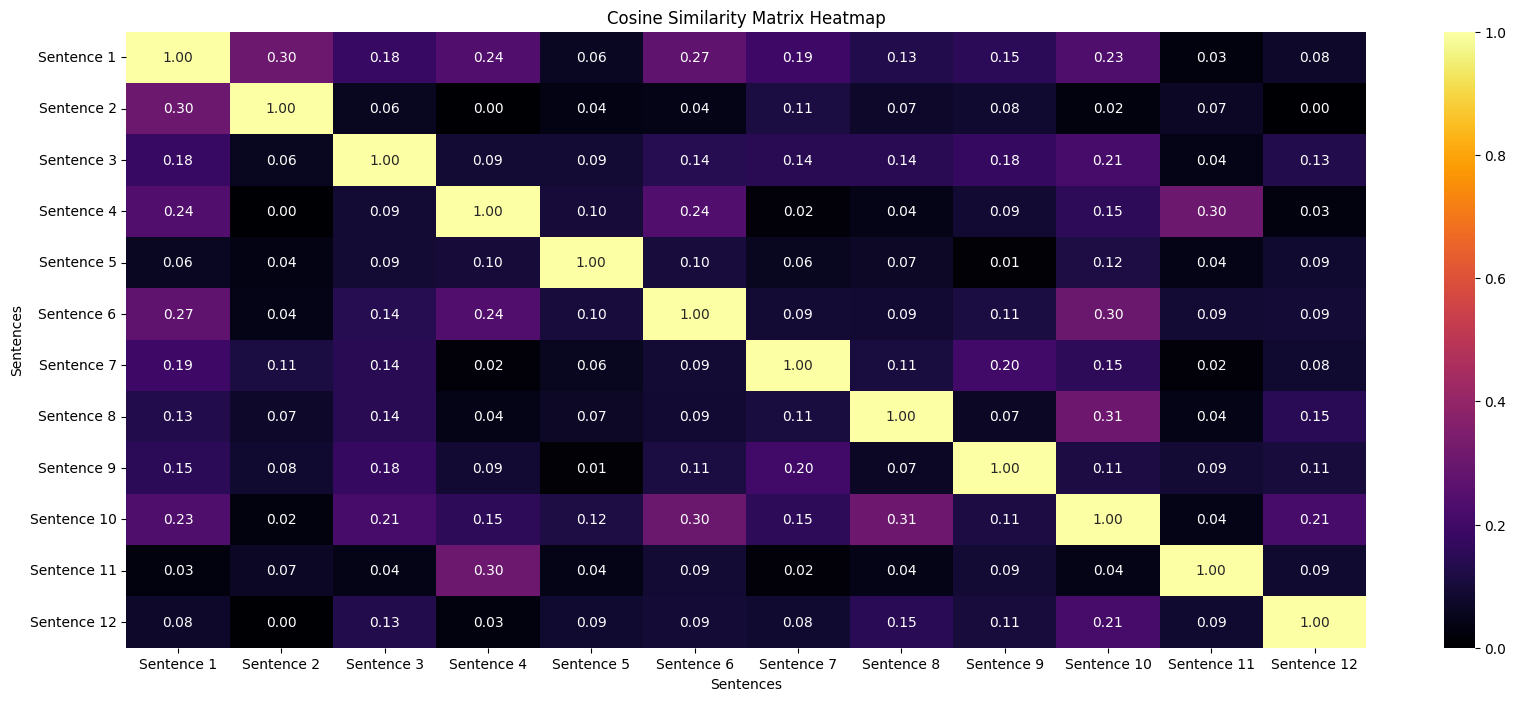

[In the realm of artificial intelligence, machine learning is a critical subset that focuses on the development of algorithms that allow computers to learn and make predictions based on data., One practical application of NLP and deep learning is the development of chatbots and virtual assistants., One of the key challenges in NLP is enabling computers to read and understand context in a way that is meaningful and useful.]


In [225]:
lines = extractive_summary_with_visualisation(test, 3)

print(lines)

#### Visualization:

In [226]:
len(lines)
print(lines[0])
print(lines[2])



In the realm of artificial intelligence, machine learning is a critical subset that focuses on the development of algorithms that allow computers to learn and make predictions based on data.
One of the key challenges in NLP is enabling computers to read and understand context in a way that is meaningful and useful.


### 5. Extractive summarization (Word level):

In [227]:
def preprocess_data_words(text: str):
    """Preprocesses data by **tokenizing**, **removing stopwords** and **removing punctuation**."""
    doc = nlp(text.lower())

    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]

    return tokens

In [228]:
text = lines[0].text + " " + lines[1].text + " " + lines[2].text
print(preprocess_data_words(test))
print(type(preprocess_data_words(test)))
len(preprocess_data_words(test))

['realm', 'artificial', 'intelligence', 'machine', 'learning', 'critical', 'subset', 'focus', 'development', 'algorithm', 'allow', 'computer', 'learn', 'prediction', 'base', 'datum', 'algorithm', 'build', 'model', 'base', 'sample', 'datum', 'know', 'training', 'datum', 'decision', 'prediction', 'explicitly', 'program', 'perform', 'task', 'machine', 'learning', 'powerful', 'tool', 'make', 'sense', 'large', 'volume', 'datum', 'apply', 'variety', 'field', 'include', 'finance', 'healthcare', 'transportation', '\n\n', 'natural', 'language', 'processing', 'nlp', 'branch', 'artificial', 'intelligence', 'help', 'computer', 'understand', 'interpret', 'manipulate', 'human', 'language', 'nlp', 'draw', 'discipline', 'include', 'computer', 'science', 'computational', 'linguistic', 'fill', 'gap', 'human', 'communication', 'computer', 'understanding', 'key', 'challenge', 'nlp', 'enable', 'computer', 'read', 'understand', 'context', 'way', 'meaningful', 'useful', '\n\n', 'deep', 'learning', 'subset', 

170

In [229]:

def visualize_keywords(keywords, tfidf_scores, feature_names):
    """Visualize the TF-IDF scores of the top keywords."""
    keyword_indices = [feature_names.index(keyword) for keyword in keywords]
    scores = [tfidf_scores[index] for index in keyword_indices]

    plt.figure(figsize=(10, 6))
    plt.barh(keywords, scores, color='skyblue')
    plt.xlabel('TF-IDF Score')
    plt.ylabel('Keywords')
    plt.title('Top Keywords by TF-IDF Score')
    plt.gca().invert_yaxis()
    plt.show()

In [230]:
def extract_keywords(text, n):
    """Extract `n` number of of highgest ranked keywords found in the text."""

    doc = nlp(text)

    # Preprocess tokens:
    tokens = preprocess_data_words(text)

    # Convert list of tokens to single string:
    processed_text = " ".join(tokens)

    # Compute TF IDF:
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform([processed_text])

    # Get TF IDF scores:
    feature_names = tfidf_vectorizer.get_feature_names_out()
    tfidf_scores = tfidf_matrix.toarray()[0]

    # Get the top keywords based on TF IDF scores:
    top_keyword_indices = np.argsort(tfidf_scores)[-n:]
    top_keyword = [feature_names[i] for i in top_keyword_indices][::-1]


    return top_keyword

In [231]:
extract_keywords(test, 10)

['learning',
 'deep',
 'datum',
 'computer',
 'machine',
 'nlp',
 'model',
 'language',
 'virtual',
 'understand']

# Abstraction Summary:
____


Steps:
#### 


## 1. Set up the data required:

#### 1.1. Get dataset from `datasets`:

In [232]:
from datasets import load_dataset

dataset = load_dataset("cnn_dailymail", "3.0.0")

Using the latest cached version of the dataset since cnn_dailymail couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration '3.0.0' at C:\Users\theso\.cache\huggingface\datasets\cnn_dailymail\3.0.0\0.0.0\96df5e686bee6baa90b8bee7c28b81fa3fa6223d (last modified on Fri Aug  2 13:51:21 2024).


In [233]:
for split in dataset:
    print(f"Size of {split} data: {len(dataset[split])}")

Size of train data: 287113
Size of validation data: 13368
Size of test data: 11490


#### 1.2. Create training and testing splits:

In [234]:
train_data = dataset['train']
test_data = dataset['test']

#### 1.3. Check attributes of the dataset:

In [235]:
print(train_data[0])

{'article': 'LONDON, England (Reuters) -- Harry Potter star Daniel Radcliffe gains access to a reported £20 million ($41.1 million) fortune as he turns 18 on Monday, but he insists the money won\'t cast a spell on him. Daniel Radcliffe as Harry Potter in "Harry Potter and the Order of the Phoenix" To the disappointment of gossip columnists around the world, the young actor says he has no plans to fritter his cash away on fast cars, drink and celebrity parties. "I don\'t plan to be one of those people who, as soon as they turn 18, suddenly buy themselves a massive sports car collection or something similar," he told an Australian interviewer earlier this month. "I don\'t think I\'ll be particularly extravagant. "The things I like buying are things that cost about 10 pounds -- books and CDs and DVDs." At 18, Radcliffe will be able to gamble in a casino, buy a drink in a pub or see the horror film "Hostel: Part II," currently six places below his number one movie on the UK box office char

In [236]:
print(test_data[0])

{'article': '(CNN)The Palestinian Authority officially became the 123rd member of the International Criminal Court on Wednesday, a step that gives the court jurisdiction over alleged crimes in Palestinian territories. The formal accession was marked with a ceremony at The Hague, in the Netherlands, where the court is based. The Palestinians signed the ICC\'s founding Rome Statute in January, when they also accepted its jurisdiction over alleged crimes committed "in the occupied Palestinian territory, including East Jerusalem, since June 13, 2014." Later that month, the ICC opened a preliminary examination into the situation in Palestinian territories, paving the way for possible war crimes investigations against Israelis. As members of the court, Palestinians may be subject to counter-charges as well. Israel and the United States, neither of which is an ICC member, opposed the Palestinians\' efforts to join the body. But Palestinian Foreign Minister Riad al-Malki, speaking at Wednesday

In [237]:
print(type(train_data))

<class 'datasets.arrow_dataset.Dataset'>


In [238]:
print(dataset.keys())

dict_keys(['train', 'validation', 'test'])


In [239]:
print(train_data)
print(test_data)

Dataset({
    features: ['article', 'highlights', 'id'],
    num_rows: 287113
})
Dataset({
    features: ['article', 'highlights', 'id'],
    num_rows: 11490
})


In [240]:
for (value) in train_data[0:10]:
    print(value)

article
highlights
id


#### 1.4. Get dataset statistics:


In [241]:
print(dataset['train'].description)

In [244]:
for split in dataset:
    print(f'------------------')
    print(f"Features: {dataset[split].features}")
    print(f'Number of examples: {len(dataset[split])}')
    print(f"Sample data:\n{dataset[split][0]}\n")

------------------
Features: {'article': Value(dtype='string', id=None), 'highlights': Value(dtype='string', id=None), 'id': Value(dtype='string', id=None)}
Number of examples: 287113
Sample data:
{'article': 'LONDON, England (Reuters) -- Harry Potter star Daniel Radcliffe gains access to a reported £20 million ($41.1 million) fortune as he turns 18 on Monday, but he insists the money won\'t cast a spell on him. Daniel Radcliffe as Harry Potter in "Harry Potter and the Order of the Phoenix" To the disappointment of gossip columnists around the world, the young actor says he has no plans to fritter his cash away on fast cars, drink and celebrity parties. "I don\'t plan to be one of those people who, as soon as they turn 18, suddenly buy themselves a massive sports car collection or something similar," he told an Australian interviewer earlier this month. "I don\'t think I\'ll be particularly extravagant. "The things I like buying are things that cost about 10 pounds -- books and CDs and

## 2. Preprocess the data to feed into the model:

## 3. Build a Baseline model:

#### BART (Bidirectional and Auto-Regressive Transformers) Architecture:
**BART** combines the strengths of both **bidirectional (like BERT)** and **autoregressive (like GPT)** models. It is particularly effective for text generation tasks such as *summarization*, *translation*, and more. The BART architecture consists of an encoder and a decoder, both based on the `Transformer architecture`.
_____
##### Components of BART Architecture:
#### 1. Encoder:
* **Bidirectional**: Like BERT, the encoder in BART is `bidirectional`. It means that each token in the input can attend to all other tokens in the sequence, both before and after it.
* **Masked Language Modeling (MLM)**: During training, some tokens in the input are masked, and the model learns to predict these `masked tokens`.

#### 2. Decoder:
* **Autoregressive**: Like GPT, the decoder in BART is `autoregressive`. It means that the generation of each token depends on the previously generated tokens.
* **Masked Self-Attention**: During training, the decoder can only attend to the previous tokens in the sequence, ensuring that the prediction of a token depends only on the previous tokens.
* **Denoising Pre-training**:
    - `Noise Functions`: BART is pre-trained using a set of noise functions that corrupt the input text in various ways, such as `token masking`, `token deletion`, `text infilling`, `sentence permutation`, and `document rotation`.
    - `Objective`: The model learns to reconstruct the original text from the corrupted input. This pre-training step helps the model to learn a robust representation of the input text.
____
Detailed Architecture:

### Layers:
The **encoder** and **decoder** both consist of multiple layers of transformers (typically `6-12 layers`).
Each layer consists of **self-attention mechanisms** followed by **feed-forward neural networks**.

#### 3. Attention Mechanism:
In the encoder, each token can attend to all other tokens in the input sequence (bidirectional attention).
In the decoder, each token can attend to all previous tokens in the output sequence (autoregressive attention) as well as to all tokens in the encoder output (cross-attention).

### 4. Feed-Forward Neural Networks:
Each transformer layer includes a feed-forward neural network applied to each token independently.
Positional Encodings:

Positional encodings are added to the input embeddings to provide the model with information about the token positions in the sequence.
BART for Summarization
When using BART for summarization, the process involves:

Input Encoding:

The input text is tokenized and passed through the encoder. The encoder generates a sequence of hidden states.
Decoding:

The decoder generates the summary one token at a time. For each token, the decoder attends to the encoder's hidden states and the previously generated tokens.
Training Objective:

During training, the model is provided with both the input text and the target summary. The training objective is to maximize the likelihood of the target summary given the input text.
___
### Implementing BART in PyTorch
To implement BART from scratch using `PyTorch`, you would need to:

1. Define the Transformer Encoder and Decoder:

2. Implement multi-head self-attention, feed-forward networks, and positional encodings.

3. Implement the Denoising Pre-training Task:

4. Create noise functions to corrupt the input text and train the model to reconstruct the original text.